In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'src')))
from financial_analysis import process_all_stocks

In [14]:
# Load Data Path
STOCK_DATA_DIR = '../data/yfinance_data/Data' 

### Quantitative Analysis Execution 

In [15]:
print("--- Running Task 2: Technical Indicators Calculation ---")

# 1. Process all stock files (loads, cleans, calculates SMA, RSI, MACD)
# This should now find all 6 CSV files.
all_stocks_indicators = process_all_stocks(STOCK_DATA_DIR)

print(f"\nSuccessfully calculated indicators for {len(all_stocks_indicators)} stocks: {all_stocks_indicators.keys()}")

# Get the processed data for a single stock (e.g., META) for visualization 

meta_df = all_stocks_indicators['META'] 
print("\nProcessed META DataFrame Tail (with indicators):")
print(meta_df[['Date', 'Close', 'SMA', 'RSI', 'MACD', 'MACD_Signal']].tail())

--- Running Task 2: Technical Indicators Calculation ---
Processing indicators for AAPL...
Processing indicators for AMZN...
Processing indicators for GOOG...
Processing indicators for META...
Processing indicators for MSFT...
Processing indicators for NVDA...

Successfully calculated indicators for 6 stocks: dict_keys(['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA'])

Processed META DataFrame Tail (with indicators):
           Date       Close         SMA        RSI      MACD  MACD_Signal
2918 2023-12-22  351.224823  323.317843  67.333885  6.945367     4.729907
2919 2023-12-26  352.655975  324.115724  68.187000  7.436800     5.271285
2920 2023-12-27  355.637543  324.844828  69.947874  7.974921     5.812012
2921 2023-12-28  356.124634  325.527023  70.237702  8.344500     6.318510
2922 2023-12-29  351.791290  326.262290  64.296803  8.193282     6.693464


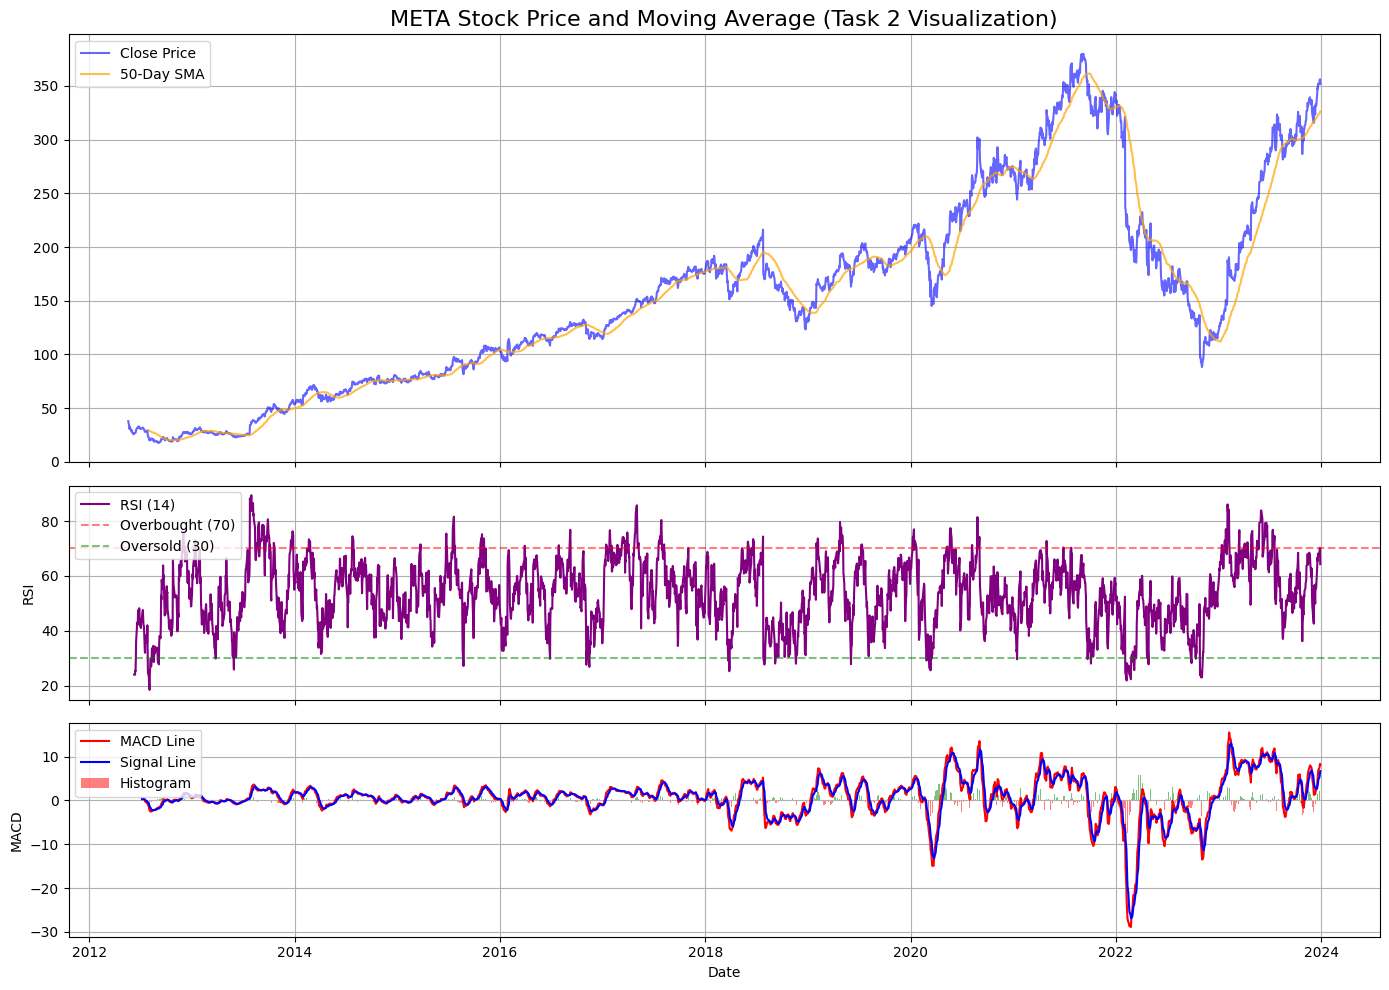

In [16]:
##  Visualization for KPIs
def plot_indicators(df, ticker):
    """
    Plots Price/SMA, RSI, and MACD in a single, comprehensive figure, 
    fulfilling the visualization KPI for Task 2.
    """
    df['Date'] = pd.to_datetime(df['Date'])
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [2, 1, 1]})
    
    # Price and SMA Plot
    ax1.plot(df['Date'], df['Close'], label='Close Price', color='blue', alpha=0.6)
    ax1.plot(df['Date'], df['SMA'], label='50-Day SMA', color='orange', alpha=0.7)
    ax1.set_title(f'{ticker} Stock Price and Moving Average (Task 2 Visualization)', fontsize=16)
    ax1.legend(loc='upper left')
    ax1.grid(True)
    
    # RSI Plot
    ax2.plot(df['Date'], df['RSI'], label='RSI (14)', color='purple')
    ax2.axhline(70, linestyle='--', color='red', alpha=0.5, label='Overbought (70)')
    ax2.axhline(30, linestyle='--', color='green', alpha=0.5, label='Oversold (30)')
    ax2.set_ylabel('RSI')
    ax2.legend(loc='upper left')
    ax2.grid(True)
    
    # MACD Plot 

# Image of Moving Average Convergence Divergence (MACD) chart

    ax3.bar(df['Date'], df['MACD_Hist'].fillna(0), label='Histogram', color=np.where(df['MACD_Hist'].fillna(0) > 0, 'green', 'red'), alpha=0.5)
    ax3.plot(df['Date'], df['MACD'], label='MACD Line', color='red', linewidth=1.5)
    ax3.plot(df['Date'], df['MACD_Signal'], label='Signal Line', color='blue', linewidth=1.5)
    ax3.set_ylabel('MACD')
    ax3.set_xlabel('Date')
    ax3.legend(loc='upper left')
    ax3.grid(True)
    
    plt.tight_layout()
    plt.show()

plot_indicators(meta_df, 'META')